# **Import neccessary libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings
%matplotlib inline

# **Read Dataset**

In [65]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/life_expectancy.csv')
df.head()

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


# **Sanity check of data**

In [66]:
df.shape

(17003, 8)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17003 entries, 0 to 17002
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17003 non-null  int64  
 1   Country                 17003 non-null  object 
 2   Country Code            17003 non-null  object 
 3   Year                    17003 non-null  int64  
 4   Female Life Expectancy  17003 non-null  float64
 5   Male Life Expectancy    17003 non-null  float64
 6   Population              17003 non-null  float64
 7   Life Expectancy Gap     17003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


In [68]:
df.describe()

,Unnamed: 0,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,9133.030171,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,5340.684374,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,0.000000,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,4401.500000,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,9019.000000,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,13852.500000,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,18407.000000,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


In [69]:
df.describe(include = object)

,Country,Country Code
count,17003,17003
unique,247,247
top,Lebanon,LBN
freq,72,72


In [70]:
df = df.drop(['Unnamed: 0'] , axis = 1)

In [71]:
df.head()

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000


# **Exploratory data analysis**

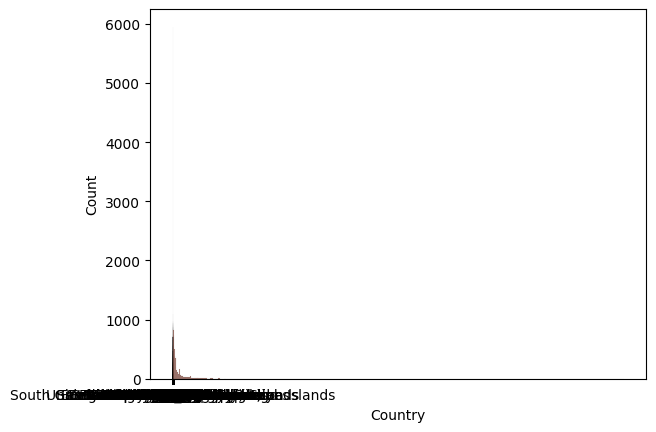

In [72]:
for i in df.columns :
  sns.histplot(data = df, x = i)

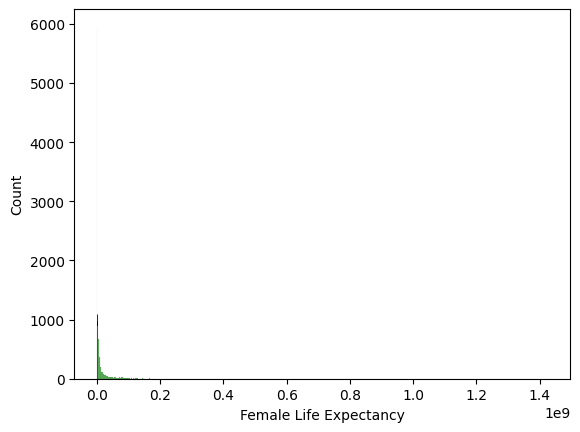

In [73]:
for i in df.select_dtypes(include = 'float').columns :
  sns.histplot(data = df , x = i)

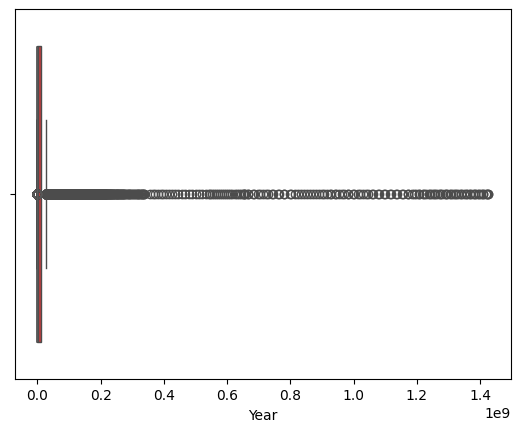

In [74]:
for i in df.select_dtypes(include = 'number').columns :
  sns.boxplot(data = df , x = i)

<Axes: xlabel='Female Life Expectancy', ylabel='Male Life Expectancy'>

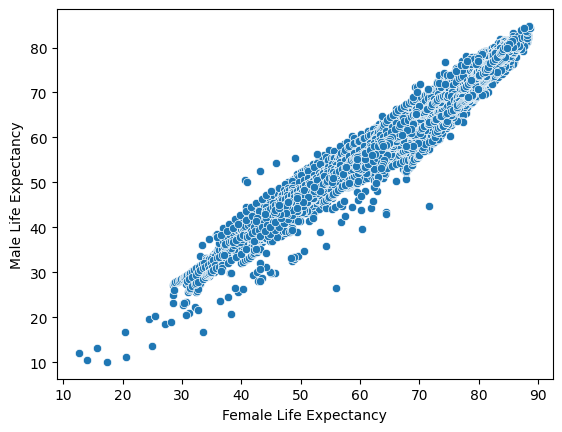

In [75]:
sns.scatterplot(x = df['Female Life Expectancy'] , y = df['Male Life Expectancy'])

<Axes: xlabel='Female Life Expectancy', ylabel='Male Life Expectancy'>

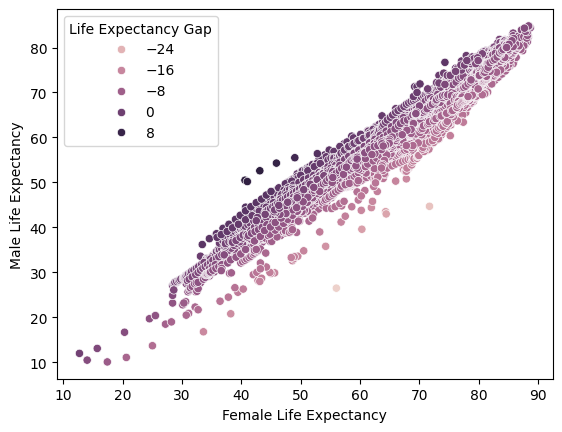

In [76]:
sns.scatterplot(x = df['Female Life Expectancy'] , y = df['Male Life Expectancy'] , hue = df['Life Expectancy Gap'])

# **Missing value treatments**

In [77]:
df.isnull().sum()

Country                   0
Country Code              0
Year                      0
Female Life Expectancy    0
Male Life Expectancy      0
Population                0
Life Expectancy Gap       0
dtype: int64

In [78]:
corr = df.corr()
corr

<ipython-input-78-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
Year,1.000000,0.547025,0.554652,0.073588,-0.178963
Female Life Expectancy,0.547025,1.000000,0.983369,0.022047,-0.475270
Male Life Expectancy,0.554652,0.983369,1.000000,0.032857,-0.307570
Population,0.073588,0.022047,0.032857,1.000000,0.043666
Life Expectancy Gap,-0.178963,-0.475270,-0.307570,0.043666,1.000000


<Axes: >

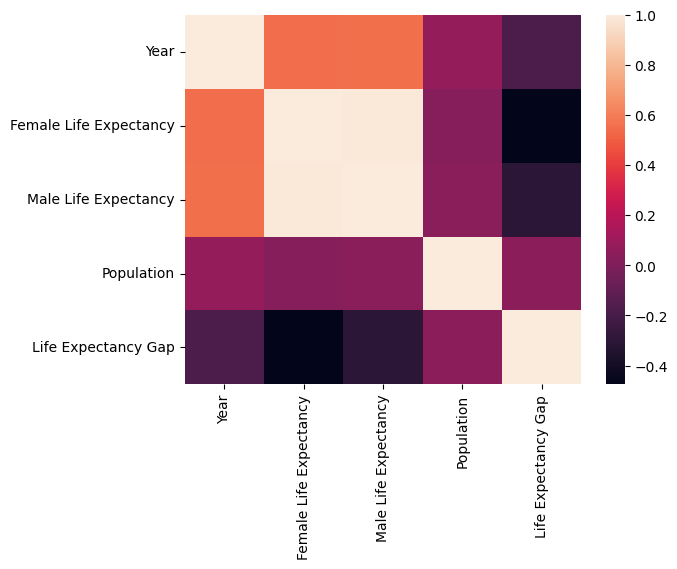

In [79]:
sns.heatmap(corr)

# **Feature selection**



*   training features (Female Life , Male Life Expectancy and Population)
*   testing feature (Life Expectancy Gap)



# **Data splitting for model training**

In [80]:
df.head(1)

,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589


In [81]:
x = df.drop(['Country' , 'Country Code' , 'Year' , 'Life Expectancy Gap'] , axis = 1)

y = df['Life Expectancy Gap']

In [82]:
x

,Female Life Expectancy,Male Life Expectancy,Population
0,66.168444,61.202554,2.131189e+07
1,28.400000,27.100000,7.480464e+06
2,28.600000,27.400000,7.571542e+06
3,29.100000,27.800000,7.667534e+06
4,29.600000,28.300000,7.764549e+06
...,...,...,...
16998,63.000000,58.200000,1.475110e+07
16999,63.600000,59.000000,1.505219e+07
17000,63.700000,58.600000,1.535461e+07
17001,63.900000,58.100000,1.566966e+07


In [83]:
y

0       -4.96589
1       -1.30000
2       -1.20000
3       -1.30000
4       -1.30000
          ...   
16998   -4.80000
16999   -4.60000
17000   -5.10000
17001   -5.80000
17002   -5.80000
Name: Life Expectancy Gap, Length: 17003, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [85]:
print(df.shape , x_train.shape , y_train.shape)

(17003, 7) (13602, 3) (13602,)


In [86]:
x_test.shape

(3401, 3)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.68266812,  0.53625849,  0.69705617],
       [ 0.95424991,  0.84704042,  2.22666071],
       [-0.12408956, -0.14573518, -0.22172926],
       ...,
       [ 0.47498792,  0.39813319, -0.22382153],
       [ 1.377598  ,  1.226885  , -0.22201243],
       [ 1.07406541,  0.82114193, -0.21918951]])

In [89]:
x_test = scaler.transform(x_test)
x_test

array([[ 1.2338194 ,  1.32184614, -0.2221129 ],
       [ 0.13950454,  0.13051542,  0.26085391],
       [-1.8094942 , -1.63058218, -0.09762943],
       ...,
       [-0.29183125, -0.63780657, -0.18714318],
       [ 1.45747499,  1.61536241, -0.21840314],
       [ 0.20340613, -0.05940687, -0.17457775]])

# **model fitting and building**

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(x_train , y_train)

LinearRegression()

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
mse = cross_val_score(lr , x_train , y_train , scoring = 'neg_mean_squared_error' , cv = 5)
mse

array([-1.19669936e-28, -5.59675466e-29, -1.99205138e-28, -8.11919439e-29,
       -8.81852907e-29])

In [93]:
np.mean(mse)

-1.0884397096906149e-28

# **Checking the prediction and accuracy of the training data**

In [94]:
x_train_prediction = lr.predict(x_train)
x_train_prediction

array([-7.3, -7.1, -5.1, ..., -6.3, -8. , -8.9])

<Axes: title={'center': 'Distribution of predicted value and actual value of the training dataset'}, xlabel='predicted Value', ylabel='Actual Value'>

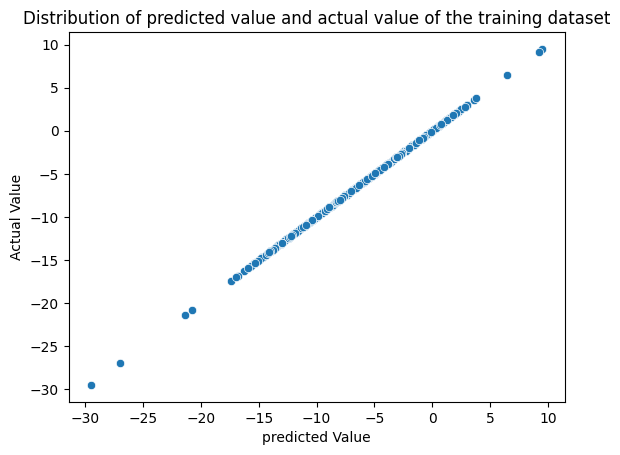

In [95]:
plt.xlabel('predicted Value')
plt.ylabel('Actual Value')
plt.title('Distribution of predicted value and actual value of the training dataset')

sns.scatterplot(x = x_train_prediction , y = y_train)

In [96]:
x_test_prediction = lr.predict(x_test)
x_test_prediction

array([-5.1, -5.2, -1.2, ..., -8.7, -4.5, -8.2])

<Axes: title={'center': 'Distribution of predicted value and actual value of the testing dataset'}, xlabel='predicted Value', ylabel='Actual Value'>

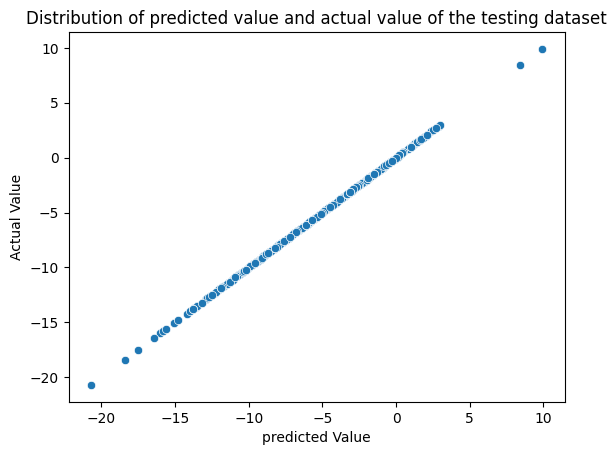

In [97]:
plt.xlabel('predicted Value')
plt.ylabel('Actual Value')
plt.title('Distribution of predicted value and actual value of the testing dataset')

sns.scatterplot(x = x_test_prediction , y = y_test)

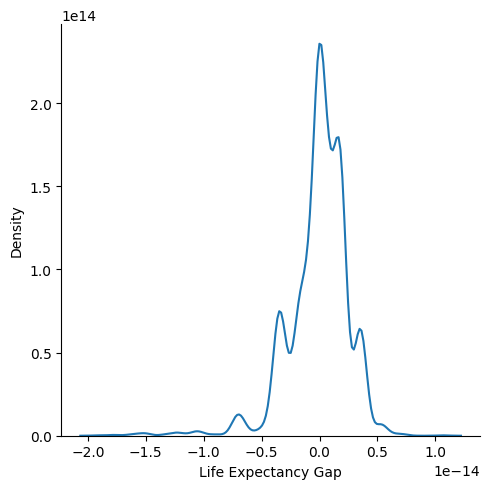

In [98]:
sns.displot(x_test_prediction - y_test , kind = 'kde')

In [99]:
r2_score(x_train_prediction , y_train)

1.0

In [100]:
r2_score(x_test_prediction , y_test)

1.0